In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import norm
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from PIL import Image, ImageSequence

## Functions

In [2]:
def fileRead(filename):
    
    #xmlデータを読み込みます
    tree = ET.parse(filename)
    #一番上の階層の要素を取り出します
    root = tree.getroot()
    
    X,Y,Z=[],[],[]
    totI=[]
    
    for Spot in root.iter('Spot'):
        X.append(float(Spot.attrib["POSITION_X"]))
        Y.append(float(Spot.attrib["POSITION_Y"]))
        Z.append(float(Spot.attrib["POSITION_Z"]))
        totI.append(float(Spot.attrib["TOTAL_INTENSITY_CH1"]))
    return X,Y,Z, totI


def fit(Z, totI):
    def line(x, a, b):
        return a*x + b
    p0 = (0.1, -0.1)
    popt,pcov = curve_fit(line, Z, totI , p0)
    print(popt, pcov)
    
    Ifit = popt[0]*np.array(Z)+popt[1]
    perr = np.sqrt(np.diag(pcov))
    return popt, pcov, Ifit, perr


def pltdist(X,Y,xlabel, ylabel, savename):
    plt.figure(figsize=(12, 8))
    # plt.grid(color = "gray", linestyle="--")
    plt.legend( ) # add legend
    # plt.subplot(221)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.xlabel(xlabel, fontsize = 20) # x axis label
    plt.ylabel(ylabel, fontsize = 20) # y axis label
    plt.plot(X, Y, ".",color="red")
    plt.savefig(savename)
    plt.show()


def plttot(Z,totI,Ifit, xlabel, ylabel, popt, savename, ylim=[0,1*10**6]):
    plt.figure(figsize=(12, 8))
    # plt.grid(color = "gray", linestyle="--")
    # plt.subplot(222)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.ylim(ylim)
    plt.xlabel(xlabel, fontsize = 20) # x axis label
    plt.ylabel(ylabel, fontsize = 20) # y axis label
    plt.plot(Z, Ifit, "-", label=f"Linear Fit \n$I = {round(popt[0])}Z+{round(popt[1]*10**-6, 3)}×10^6$")
    plt.plot(Z, totI, ".",color="red")
    plt.legend(fontsize = 20) # add legend
    plt.savefig(savename)
    plt.show()

def plttotNorm(Z,totI,Ifit, xlabel, ylabel, popt, savename, ylim=[0,1]):
    plt.figure(figsize=(12, 8))
    # plt.grid(color = "gray", linestyle="--")
    # plt.subplot(222)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.ylim(ylim)
    plt.xlabel(xlabel, fontsize = 20) # x axis label
    plt.ylabel(ylabel, fontsize = 20) # y axis label
    plt.plot(Z, Ifit, "-", label=f"Linear Fit \n$I = {round(popt[0],5)}Z+{round(popt[1], 3)}$")
    plt.plot(Z, totI, ".",color="red")
    plt.legend(fontsize = 20) # add legend
    plt.savefig(savename)
    plt.show()


def plt3D(X, Y, Z, xlabel, ylabel, zlabel, savename):
    fig = plt.figure()
    # syntax for 3-D projection
    ax = plt.axes(projection ='3d')
    ax.set_xlabel(xlabel, fontsize = 10) # x axis label
    ax.set_ylabel(ylabel, fontsize = 10) # y axis label
    ax.set_zlabel(zlabel, fontsize = 10) # z axis label
    
    # plotting
    ax.plot3D(X, Y, Z, ".", color="green")
    ax.set_title('3D plot')
    plt.savefig(savename)
    plt.show()

# Original

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[-2.79089506e+00  4.33711604e+05] [[ 1.05200871e+03 -1.53826126e+05]
 [-1.53826126e+05  2.84469008e+07]]


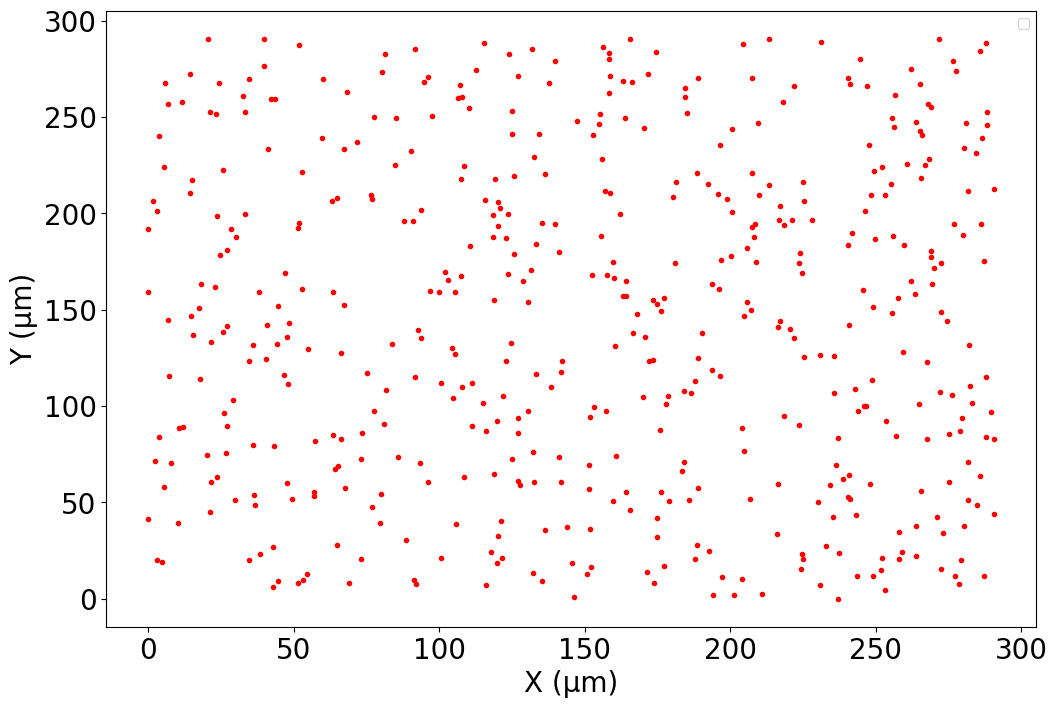

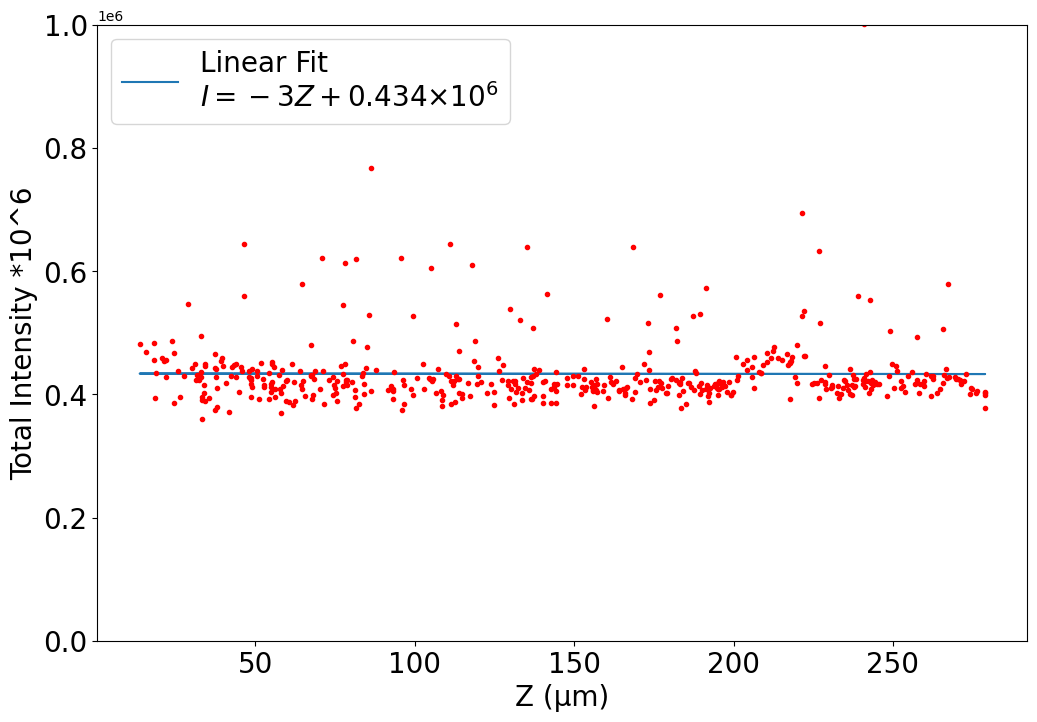

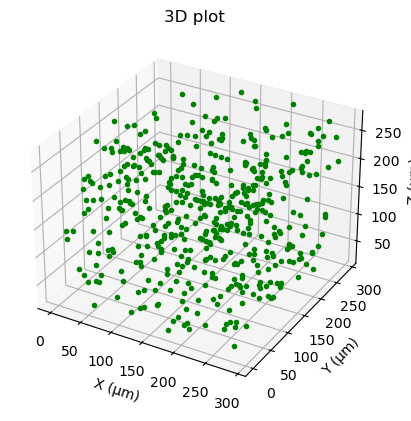

In [3]:
Xo, Yo, Zo, totIo = fileRead('../../Data/20240416/C1-beads_150424.xml')
popt, pcov, Ifito, perro = fit(Zo, totIo)


pltdist(Xo,Yo,'X (μm)', 'Y (μm)', 'fig/distributionO.jpg')
plttot(Zo,totIo,Ifito, 'Z (μm)', 'Total Intensity *10^6', popt, 'fig/TotalIntensityO.jpg')

plt3D(Xo, Yo, Zo, 'X (μm)', 'Y (μm)', 'Z (μm)', 'fig/3DplotO.jpg')

# Linear Decay

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[  -367.21110642 271929.98582791] [[ 2.94938122e+01 -1.12104648e+04]
 [-1.12104648e+04  5.40544739e+06]]


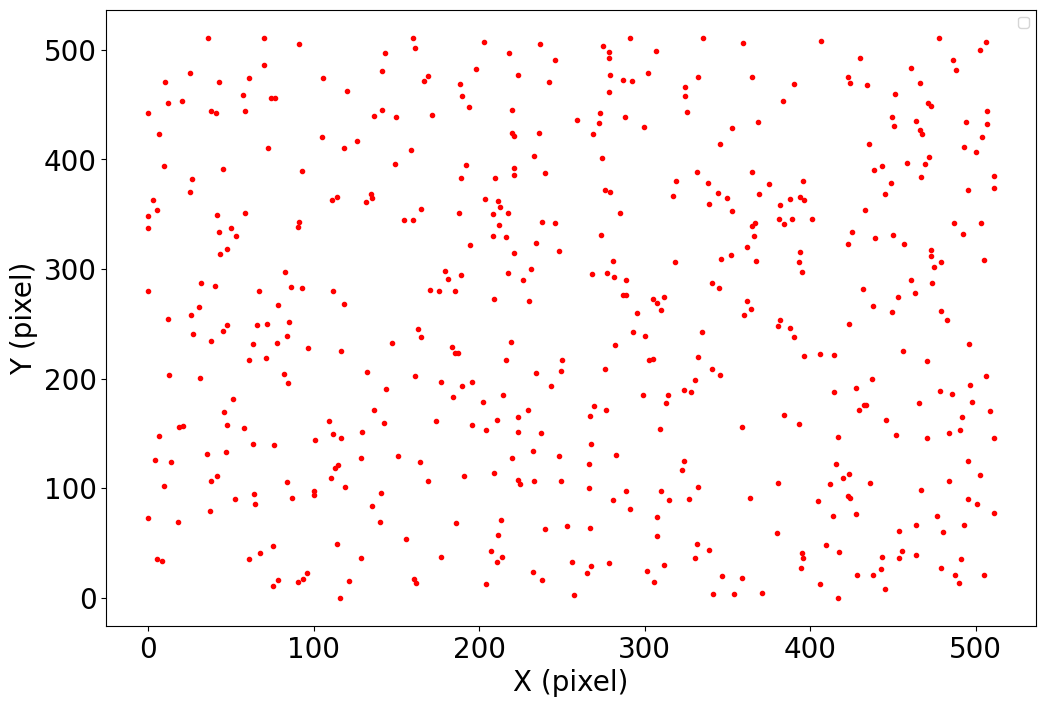

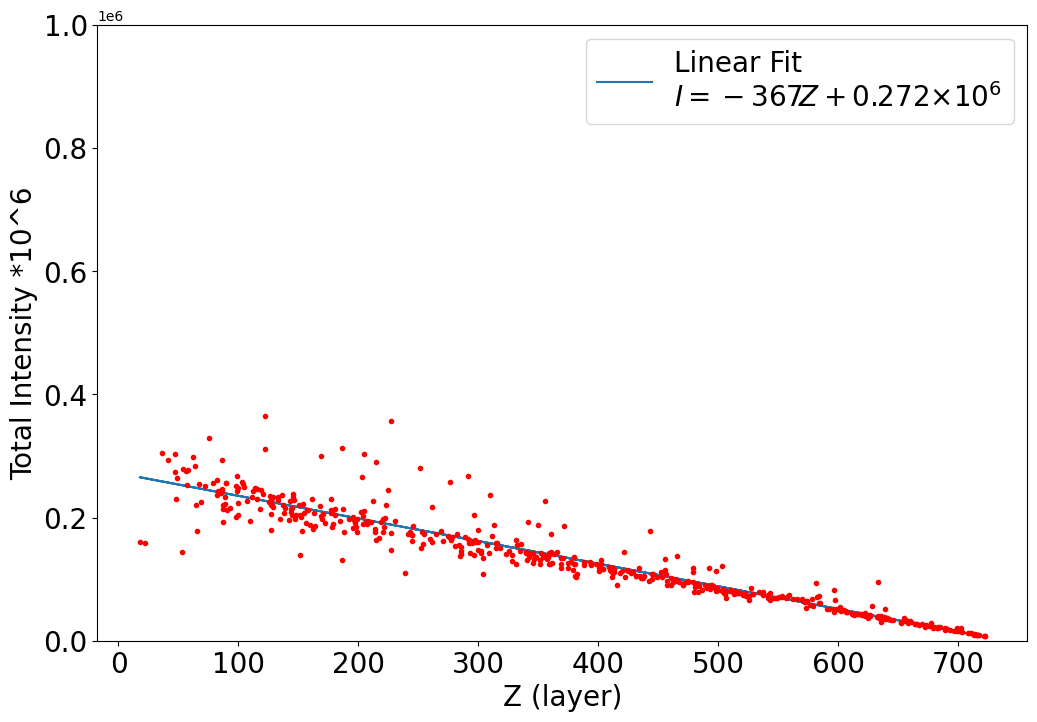

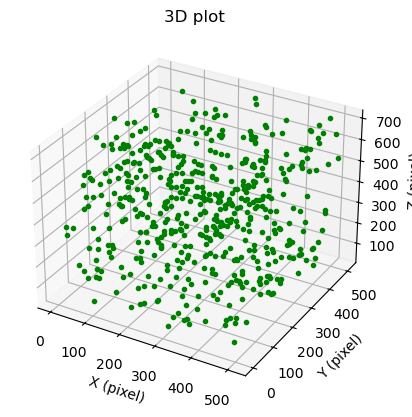

In [4]:
Xd, Yd, Zd, totId = fileRead('LinearDecay.xml')
popt, pcov, Ifitd, perrd = fit(Zd, totId)

pltdist(Xd,Yd,'X (pixel)', 'Y (pixel)', 'fig/distributionD.jpg')
plttot(Zd,totId,Ifitd, 'Z (layer)', 'Total Intensity *10^6', popt, 'fig/TotalIntensityD.jpg')

plt3D(Xd, Yd, Zd, 'X (pixel)', 'Y (pixel)', 'Z (pixel)', 'fig/3DplotD.jpg')

# Linear increase

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[ 346.05378909 8313.31264152] [[ 2.90211912e+01 -1.13631305e+04]
 [-1.13631305e+04  5.62299198e+06]]


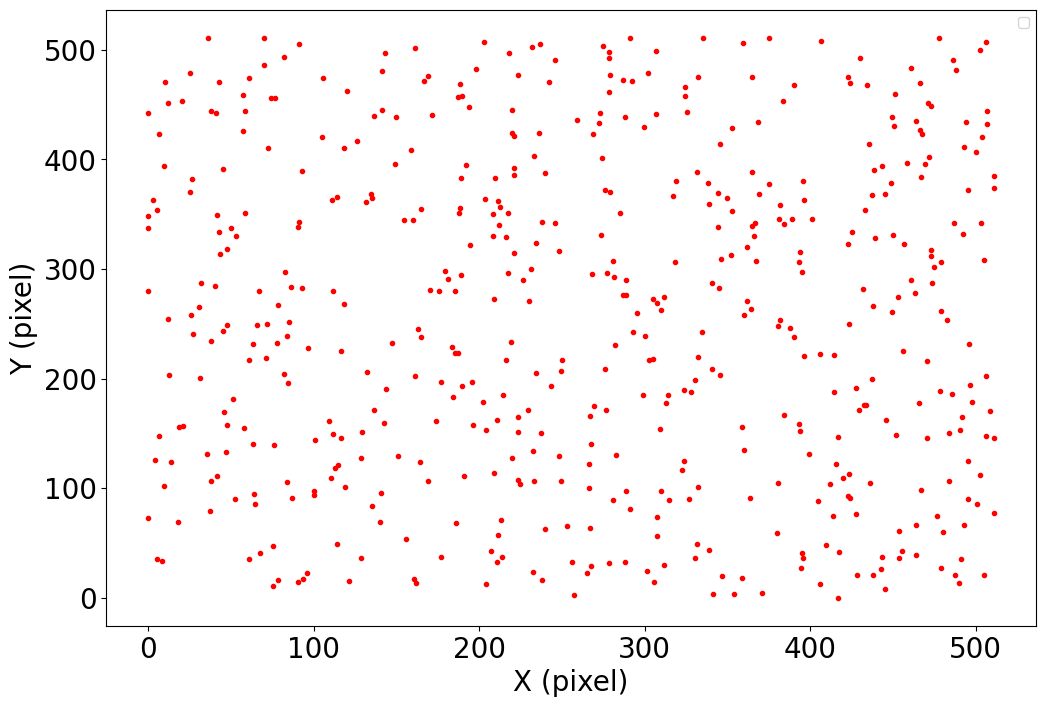

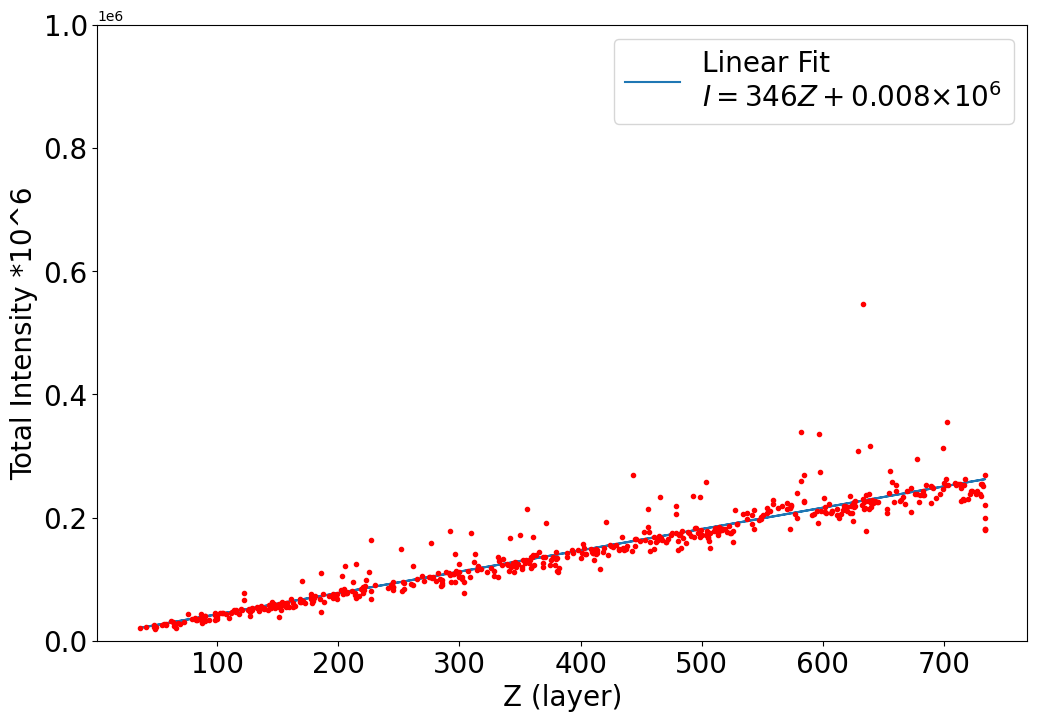

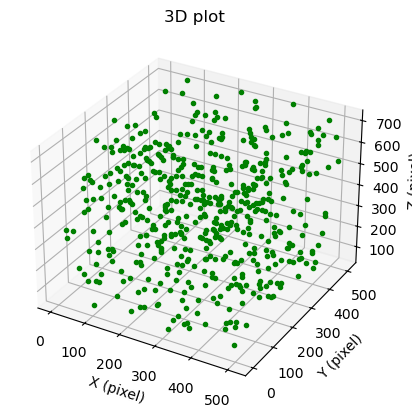

In [5]:
Xi, Yi, Zi, totIi = fileRead('LinearIncrease.xml')
popt, pcov, Ifiti, perri = fit(Zi, totIi)

pltdist(Xi,Yi,'X (pixel)', 'Y (pixel)', 'fig/distributionI.jpg')
plttot(Zi,totIi,Ifiti, 'Z (layer)', 'Total Intensity *10^6', popt, 'fig/TotalIntensityI.jpg')

plt3D(Xi, Yi, Zi, 'X (pixel)', 'Y (pixel)', 'Z (pixel)', 'fig/3Dploti.jpg')

# Summation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[-1.88462586e+01  2.81052764e+05] [[ 8.85350086e+01 -3.38560532e+04]
 [-3.38560532e+04  1.63423836e+07]]


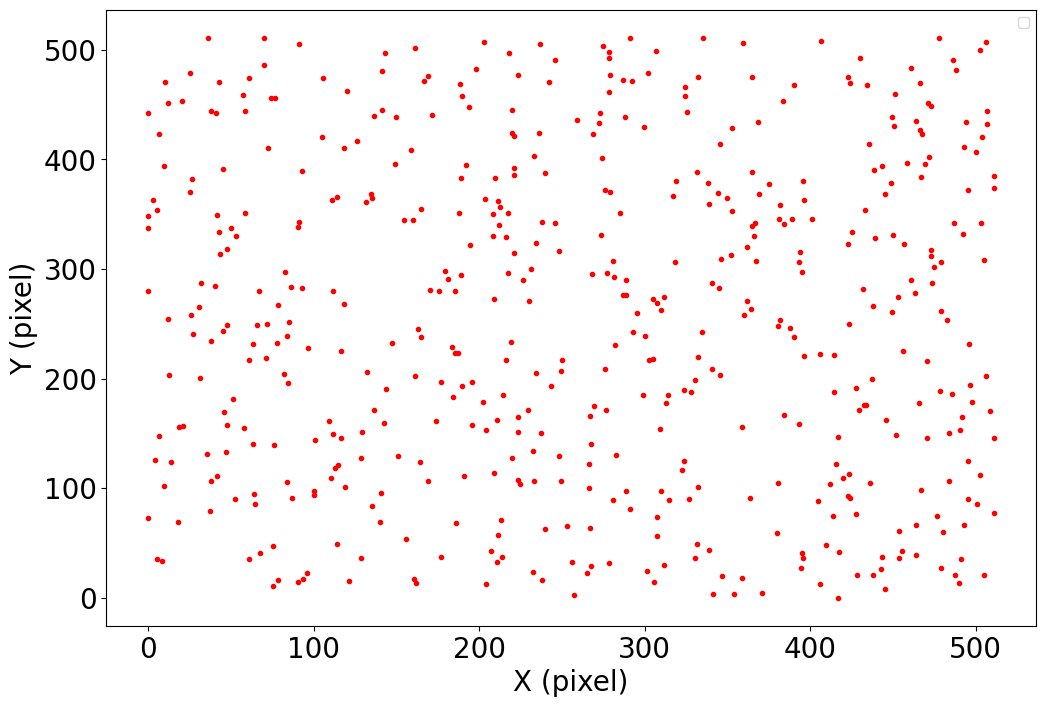

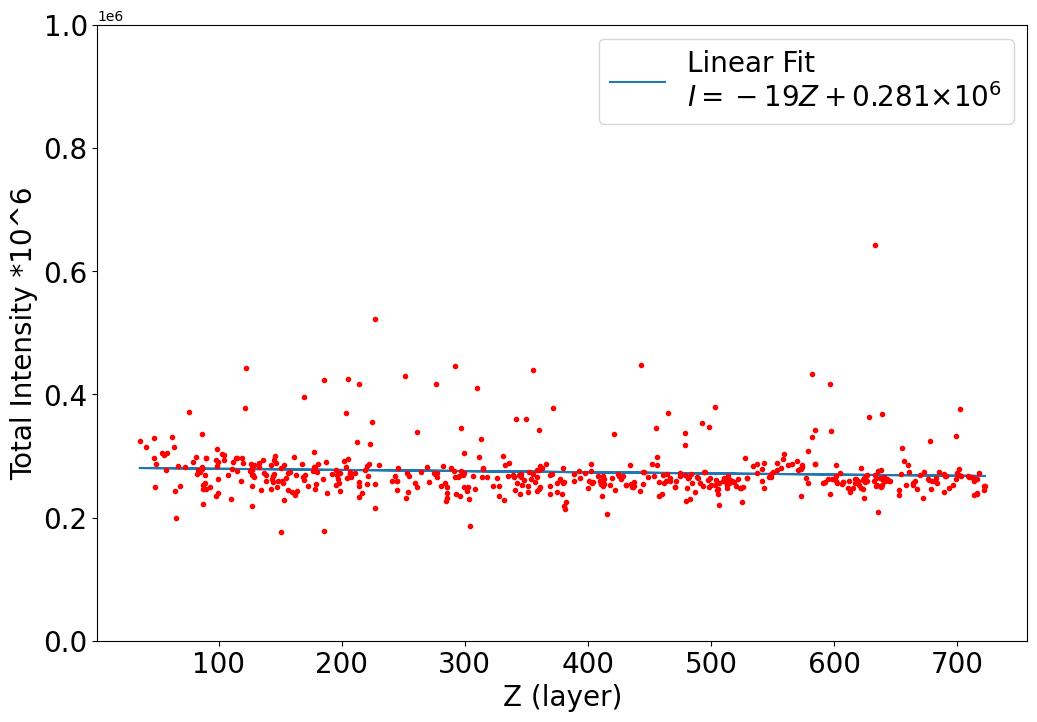

In [6]:
Xsum, Ysum, Zsum = [],[],[]
totIsum = []

CommonNumd = []
for i in range(0, len(Xd)):
    for j in range(0, len(Xi)):
        if np.abs(Xd[i] - Xi[j]) < 2 and np.abs(Yd[i] - Yi[j]) < 2 and np.abs(Zd[i] - Zi[j]) < 2:
            CommonNumd.append(i)
            Xsum.append((Xd[i]+Xi[j])/2)
            Ysum.append((Yd[i]+Yi[j])/2)
            Zsum.append((Zd[i]+Zi[j])/2)
            
            totIsum.append(totId[i]+totIi[j])

popt, pcov, Ifitsum, perrsum = fit(Zsum, totIsum)

pltdist(Xsum,Ysum,'X (pixel)', 'Y (pixel)', 'fig/distributionSUM.jpg')
plttot(Zsum,totIsum,Ifitsum, 'Z (layer)', 'Total Intensity *10^6', popt, 'fig/TotalIntensitySUM.jpg')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[-0.0013231   0.98544264] [[ 1.58634725e-14 -6.06582257e-12]
 [-6.06582257e-12  2.92783338e-09]]


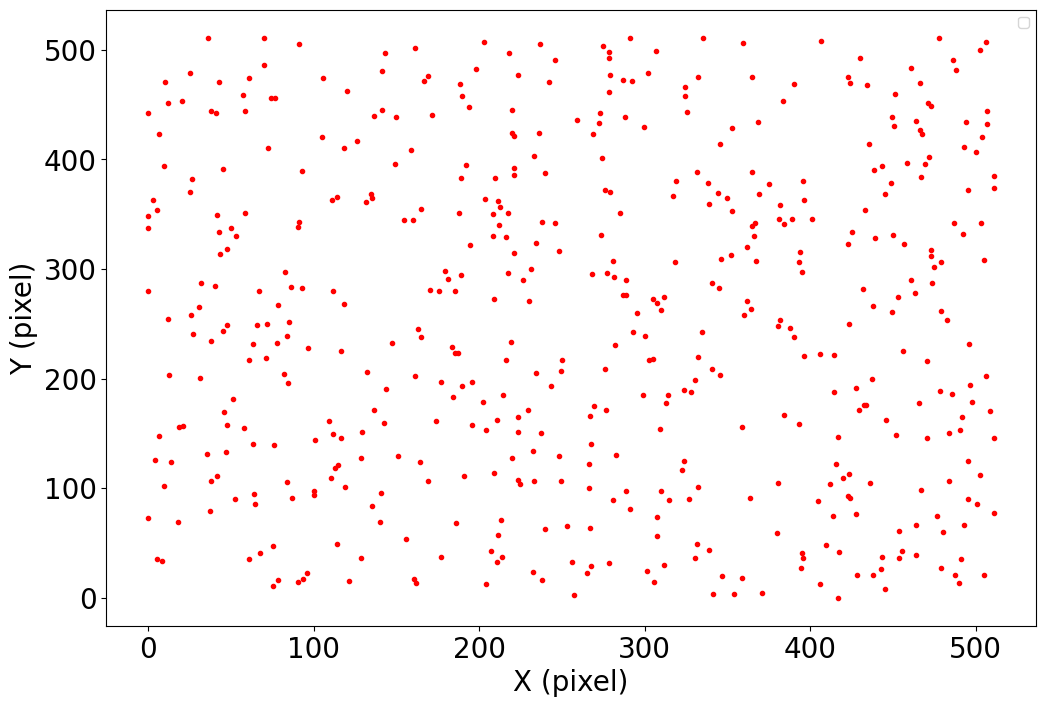

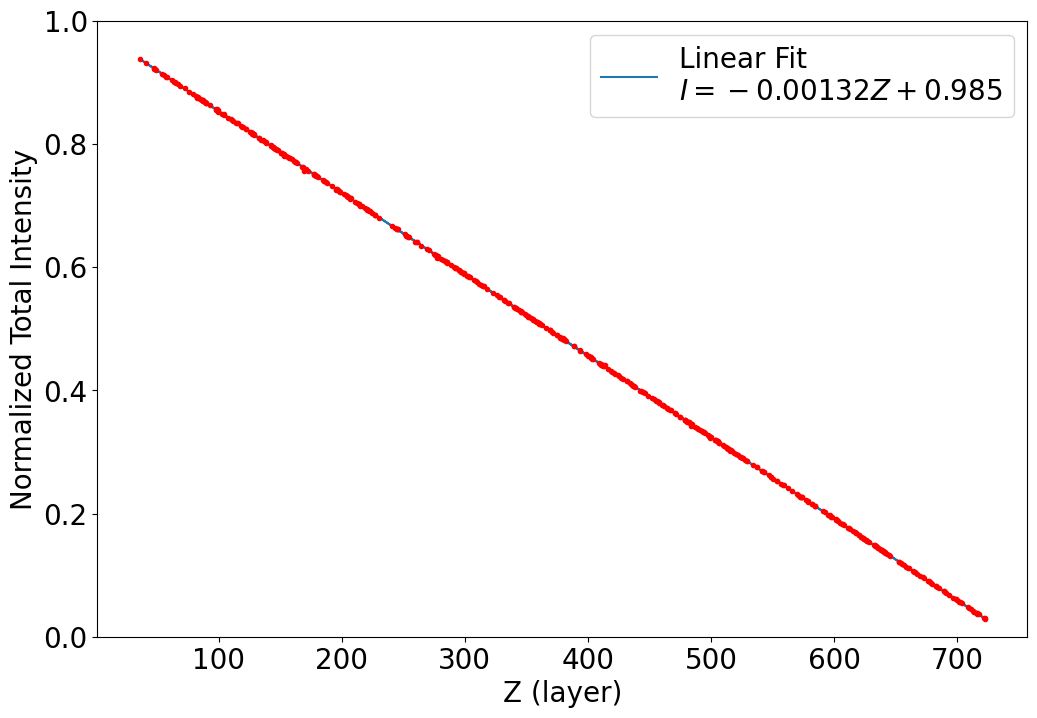

In [7]:
Xd2,Yd2,Zd2 =[],[],[]
totId2 = []
a=0
for i in CommonNumd:
    Xd2.append(Xd[CommonNumd[a]])
    Yd2.append(Yd[CommonNumd[a]])
    Zd2.append(Zd[CommonNumd[a]])
    totId2.append(totId[CommonNumd[a]])
    a += 1

totIdnorm = np.array(totId2) / np.array(totIsum)


popt, pcov, Ifitdnorm, perrdnorm = fit(Zd2, totIdnorm)

pltdist(Xd2,Yd2,'X (pixel)', 'Y (pixel)', 'fig/distributionD2.jpg')
plttotNorm(Zd2, totIdnorm, Ifitdnorm, 'Z (layer)', 'Normalized Total Intensity', popt, 'fig/TotalIntensityD2.jpg', ylim=None)
